In [23]:
#data base connection
import csv
import pandas
from sshtunnel import SSHTunnelForwarder
import pymysql

#specifiy the path for your file
with open('/Users/QN/Desktop/THIRD crowdperm/user.txt') as f:
    lines = f.read().splitlines()    
f.close()


server =    SSHTunnelForwarder(
         ('juhu.soic.indiana.edu'),
         ssh_username=lines[0],
         ssh_password=lines[1],
         remote_bind_address=('127.0.0.1', 3306))
server.start()
cnx = pymysql.connect(host='127.0.0.1',
                           port=server.local_bind_port,
                           user='mturk',
                           passwd='m+turk=my-sql',
                           db='mturk')
cnx.set_charset('utf8')  
cursor = cnx.cursor()

### How people are dealing with the new model?

### How many people using Android Marshmallow have changed permissions? (reported by users)
Q. Have you ever changed whether an app was able to access some information on your phone, for example, contacts or photos?

Yes No

(NA) means that they don't know that they can change the permissions. They answered the previous question with No: If you wanted to change whether an app had access to some information on your phone, for example, contacts or photos, could you do that?

Yes No

In [2]:
query = ("select everChanged, count(*) from survey2 group by everChanged order by count(*) DESC")
#cursor.execute(query)

#read the survey2 table into a dataframe
everChanged=pandas.read_sql_query(query, cnx) 
#ignore the empty one
everChanged=everChanged[everChanged['everChanged']!='']

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in everChanged.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    #print (row['everChanged'],"\t\t\t\t", row['count(*)'])
    total=total+row1['count(*)']
    
#print(total)
#coding the comfort level questions for stories
print ("Ever changed permissions\t", "count\t\t","%")
for index, row in everChanged.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
   # print("%.2f" % a)
    p=row['count(*)']/total*100
    print (row['everChanged'],"\t\t\t\t", row['count(*)'],"\t\t","%.2f" % p)

Ever changed permissions	 count		 %
Yes 				 187 		 60.71
No 				 94 		 30.52
NA 				 27 		 8.77


### Are people aware that they enabled all permissions for an app?
Around 77% of participants are aware about enabling all permissions for the app that we asked about.

In [3]:
query = ("select enabledallAware, count(*) from survey2 group by enabledallAware order by count(*) DESC")
#cursor.execute(query)

#read the survey2 table into a dataframe
enabledallAware=pandas.read_sql_query(query, cnx) 
#ignore the empty one
enabledallAware=enabledallAware[enabledallAware['enabledallAware']!='NA']

#calculate the total, to be able to calculate the percentage
total=0
for index1, row1 in enabledallAware.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    #print (row['everChanged'],"\t\t\t\t", row['count(*)'])
    total=total+row1['count(*)']
    
#print(total)
#coding the comfort level questions for stories
print ("Aware about enabling all\t", "count\t\t","%")
for index, row in enabledallAware.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
   # print("%.2f" % a)
    p=row['count(*)']/total*100
    print (row['enabledallAware'],"\t\t\t\t", row['count(*)'],"\t\t","%.2f" % p)

Aware about enabling all	 count		 %
Yes 				 211 		 76.73
No 				 64 		 23.27


#### Do users tend to allow specific permissions to apps more than others (find patterns)? (background data)


In [4]:
#prepare fraction of allowed permission data


query = ("select * from permissions")

cursor.execute(query)


#for (x) in cursor:
  #print("{}".format(x))

requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
fraction={'MICROPHONE':0.0,'LOCATION':0.0,'CAMERA':0.0,'CONTACTS':0.0,'PHONE':0.0,'STORAGE':0.0,'CALENDAR':0.0,'SENSORS':0.0,'SMS':0.0}

with open('permissionFractions_out.csv','w') as out:
    #myFields = ['TurkerID', 'number of permissions requested for microphone', 'number of permissions requested for location', 'number of permissions requested for camera', 'number of permissions requested for contacts', 'number of permissions requested for phone', 'number of permissions requested for storage', 'number of permissions requested for calendar','number of permissions requested sensor','number of permissions requested sms','number of permissions granted for microphone', 'number of permissions granted for location', 'number of permissions granted for camera', 'number of permissions granted for contacts', 'number of permissions granted for phone', 'number of permissions granted for storage', 'number of permissions granted for calendar','number of permissions granted sensor','number of permissions granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
   # myFields = ['TurkerID', 'number of apps requested microphone', 'number of apps requested location', 'number of apps requested camera', 'number of apps requested contacts', 'number of apps requested phone', 'number of apps requested storage', 'number of apps requested calendar','number of apps requested sensor','number of apps requested sms','number of apps granted microphone', 'number of apps granted location', 'number of apps granted camera', 'number of apps granted contacts', 'number of apps granted phone', 'number of apps granted storage', 'number of apps granted calendar','number of apps granted sensor','number of apps granted sms']
    myFields = ['TurkerID', 'number of apps requested microphone', 'number of apps requested location', 'number of apps requested camera', 'number of apps requested contacts', 'number of apps requested phone', 'number of apps requested storage', 'number of apps requested calendar','number of apps requested sensor','number of apps requested sms','number of apps granted microphone', 'number of apps granted location', 'number of apps granted camera', 'number of apps granted contacts', 'number of apps granted phone', 'number of apps granted storage', 'number of apps granted calendar','number of apps granted sensor','number of apps granted sms','fraction of apps granted microphone', 'fraction of apps granted location', 'fraction of apps granted camera', 'fraction of apps granted contacts', 'fraction of apps granted phone', 'fraction of apps granted storage', 'fraction of apps granted calendar','fraction of apps granted sensor','fraction of apps granted sms']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    prevTurk = 'nonsense'
    check = -1
    for row in cursor:
        if row[1] != prevTurk:
                if check != -1:
                    #writer.writerow({'TurkerID':prevTurk,'number of permissions requested for microphone':requestedPerm['MICROPHONE'], 'number of permissions requested for location':requestedPerm['LOCATION'], 'number of permissions requested for camera':requestedPerm['CAMERA'], 'number of permissions requested for contacts':requestedPerm['CONTACTS'], 'number of permissions requested for phone':requestedPerm['PHONE'], 'number of permissions requested for storage':requestedPerm['STORAGE'], 'number of permissions requested for calendar':requestedPerm['CALENDAR'],'number of permissions requested sensor':requestedPerm['SENSORS'],'number of permissions requested sms':requestedPerm['SMS'],'number of permissions granted for microphone':grantedPerm['MICROPHONE'], 'number of permissions granted for location':grantedPerm['LOCATION'], 'number of permissions granted for camera':grantedPerm['CAMERA'], 'number of permissions granted for contacts':grantedPerm['CONTACTS'], 'number of permissions granted for phone':grantedPerm['PHONE'], 'number of permissions granted for storage':grantedPerm['STORAGE'], 'number of permissions granted for calendar':grantedPerm['CALENDAR'],'number of permissions granted sensor':grantedPerm['SENSORS'],'number of permissions granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    #writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    #writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS']})
                    if requestedPerm['MICROPHONE']!=0:
                        fraction['MICROPHONE']= grantedPerm['MICROPHONE']/requestedPerm['MICROPHONE']                
                    else:
                        fraction['MICROPHONE']=0
                    
                    if requestedPerm['LOCATION']!=0:
                        fraction['LOCATION']= grantedPerm['LOCATION']/requestedPerm['LOCATION']                
                    else:
                        fraction['LOCATION']=0
                    
                    if requestedPerm['CAMERA']!=0:
                        fraction['CAMERA']= grantedPerm['CAMERA']/requestedPerm['CAMERA']                
                    else:
                        fraction['CAMERA']=0
                     
                    if requestedPerm['CONTACTS']!=0:
                        fraction['CONTACTS']= grantedPerm['CONTACTS']/requestedPerm['CONTACTS']                
                    else:
                        fraction['CONTACTS']=0
                     
                    if requestedPerm['PHONE']!=0:
                        fraction['PHONE']= grantedPerm['PHONE']/requestedPerm['PHONE']                
                    else:
                        fraction['PHONE']=0
                      
                    if requestedPerm['CALENDAR']!=0:
                        fraction['CALENDAR']= grantedPerm['CALENDAR']/requestedPerm['CALENDAR']                
                    else:
                        fraction['CALENDAR']=0
                    
                    if requestedPerm['SENSORS']!=0:
                        fraction['SENSORS']= grantedPerm['SENSORS']/requestedPerm['SENSORS']                
                    else:
                        fraction['SENSORS']=0
                    
                    if requestedPerm['SMS']!=0:
                        fraction['SMS']= grantedPerm['SMS']/requestedPerm['SMS']                
                    else:
                        fraction['SMS']=0
                   
                    if requestedPerm['STORAGE']!=0:
                        fraction['STORAGE']= grantedPerm['STORAGE']/requestedPerm['STORAGE']                
                    else:
                        fraction['STORAGE']=0
                    
                    writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS'],'fraction of apps granted microphone':fraction['MICROPHONE'], 'fraction of apps granted location':fraction['LOCATION'], 'fraction of apps granted camera':fraction['CAMERA'], 'fraction of apps granted contacts':fraction['CONTACTS'], 'fraction of apps granted phone':fraction['PHONE'], 'fraction of apps granted storage':fraction['STORAGE'], 'fraction of apps granted calendar':fraction['CALENDAR'],'fraction of apps granted sensor':fraction['SENSORS'],'fraction of apps granted sms':fraction['SMS']})
                    prevTurk = row[1]
                    
                    #re-initialize
                    requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                    grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                    fraction={'MICROPHONE':0.0,'LOCATION':0.0,'CAMERA':0.0,'CONTACTS':0.0,'PHONE':0.0,'STORAGE':0.0,'CALENDAR':0.0,'SENSORS':0.0,'SMS':0.0}

                else:
                    check = 1
                    prevTurk = row[1]
    
    
        
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
            
        rrPerm = rPerm.split(',')
        ggPerm = gPerm.split(',')
            
        for x in rrPerm:
            x = x.strip()
            if x != '':
                requestedPerm[x] = requestedPerm[x] + 1
        for y in ggPerm:
            y = y.strip()
            if y != '':
                grantedPerm[y] = grantedPerm[y] + 1
        
        #danger = row[8].split(',')
        


dfPermissions = pandas.read_csv('permissionFractions_out.csv',sep=',')
dfPermissions=dfPermissions[dfPermissions['number of apps requested location']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested contacts']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested camera']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested sms']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested phone']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested storage']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested calendar']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested microphone']>5]


#geta slice of the data frame for plotting
dfFractions=dfPermissions.loc[:, 'fraction of apps granted microphone':'fraction of apps granted sms']

Bellow are a box plot and a scatter plot of the permissions and the fraction of times these permissions were granted: 
The least granted permission is the contacts
The most granted one is the storage and location

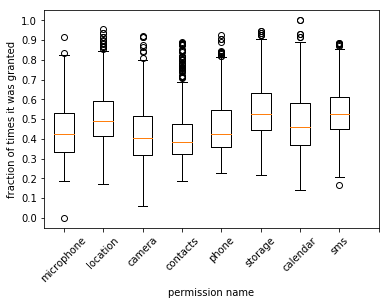

In [5]:
#plot the data:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
#fractionPermissions=[dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'], dfPermissions['fraction of apps granted phone'], dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sensor'],dfPermissions['fraction of apps granted sms']
#fractionPermissions=[dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sensor'],dfPermissions['fraction of apps granted sms']]
fractionPermissions=[dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sms']]
#fractionPermissions=[dfPermissions['fraction of apps granted contacts'], dfPermissions['fraction of apps granted camera'],dfPermissions['fraction of apps granted phone'], dfPermissions['fraction of apps granted microphone'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted sms'],dfPermissions['fraction of apps granted storage']]

plt.boxplot(fractionPermissions)
plt.xticks([1, 2, 3,4,5,6,7,8,9],['microphone','location','camera','contacts','phone','storage','calendar','sms'])
#plt.xticks([1, 2, 3,4,5,6,7,8,9],['contacts','camera','phone','microphone','calendar','location','sms','storage'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('fraction of times it was granted')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#plt.plot(meanLocation, label='Location')
#plt.legend()
plt.show()

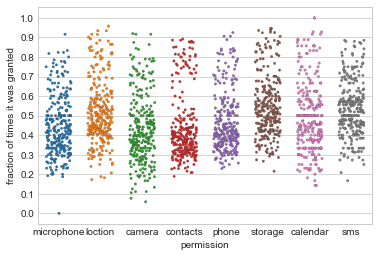

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#np.array(fractionPermissions)#geta slice of the data frame for plotting
dfFractions=dfPermissions.loc[:, 'fraction of apps granted microphone':'fraction of apps granted sms']
dfFractions.columns = ['microphone', 'loction', 'camera','contacts','phone','storage','calendar','sensor','sms']
#remove sensors
dfFractions=dfFractions.drop(['sensor'], axis=1)
#dfFractions
#iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
ax=sns.stripplot(data=dfFractions, jitter=0.3,size=2.5,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='permission', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()
#sns.despine()

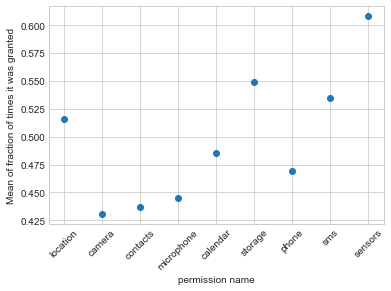

In [25]:
#prepare danger data


query = ("select a.*, b.danger from permissions a, survey2 b where a.`TurkerID`=b.`TurkerID`")

cursor.execute(query)


#for (x) in cursor:
  #print("{}".format(x))

requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}

with open('dangerLevel_out.csv','w') as out:
    #myFields = ['TurkerID', 'number of permissions requested for microphone', 'number of permissions requested for location', 'number of permissions requested for camera', 'number of permissions requested for contacts', 'number of permissions requested for phone', 'number of permissions requested for storage', 'number of permissions requested for calendar','number of permissions requested sensor','number of permissions requested sms','number of permissions granted for microphone', 'number of permissions granted for location', 'number of permissions granted for camera', 'number of permissions granted for contacts', 'number of permissions granted for phone', 'number of permissions granted for storage', 'number of permissions granted for calendar','number of permissions granted sensor','number of permissions granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
    myFields = ['TurkerID', 'number of apps requested microphone', 'number of apps requested location', 'number of apps requested camera', 'number of apps requested contacts', 'number of apps requested phone', 'number of apps requested storage', 'number of apps requested calendar','number of apps requested sensor','number of apps requested sms','number of apps granted microphone', 'number of apps granted location', 'number of apps granted camera', 'number of apps granted contacts', 'number of apps granted phone', 'number of apps granted storage', 'number of apps granted calendar','number of apps granted sensor','number of apps granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    prevTurk = 'nonsense'
    check = -1
    for row in cursor:
        if row[1] != prevTurk:
                if check != -1:
                    
                    #writer.writerow({'TurkerID':prevTurk,'number of permissions requested for microphone':requestedPerm['MICROPHONE'], 'number of permissions requested for location':requestedPerm['LOCATION'], 'number of permissions requested for camera':requestedPerm['CAMERA'], 'number of permissions requested for contacts':requestedPerm['CONTACTS'], 'number of permissions requested for phone':requestedPerm['PHONE'], 'number of permissions requested for storage':requestedPerm['STORAGE'], 'number of permissions requested for calendar':requestedPerm['CALENDAR'],'number of permissions requested sensor':requestedPerm['SENSORS'],'number of permissions requested sms':requestedPerm['SMS'],'number of permissions granted for microphone':grantedPerm['MICROPHONE'], 'number of permissions granted for location':grantedPerm['LOCATION'], 'number of permissions granted for camera':grantedPerm['CAMERA'], 'number of permissions granted for contacts':grantedPerm['CONTACTS'], 'number of permissions granted for phone':grantedPerm['PHONE'], 'number of permissions granted for storage':grantedPerm['STORAGE'], 'number of permissions granted for calendar':grantedPerm['CALENDAR'],'number of permissions granted sensor':grantedPerm['SENSORS'],'number of permissions granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    prevTurk = row[1]
                    #re-initialize
                    requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                    grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                
                else:
                    check = 1
                    prevTurk = row[1]
    
    
        
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
            
        rrPerm = rPerm.split(',')
        ggPerm = gPerm.split(',')
            
        for x in rrPerm:
            x = x.strip()
            if x != '':
                requestedPerm[x] = requestedPerm[x] + 1
        for y in ggPerm:
            y = y.strip()
            if y != '':
                grantedPerm[y] = grantedPerm[y] + 1
        
        danger = row[8].split(',')
        


dfDanger = pandas.read_csv('dangerLevel_out.csv',sep=',')
        
#cursor.close()
#cnx.close()

location=dfDanger['number of apps granted location']/dfDanger['number of apps requested location']
camera=dfDanger['number of apps granted camera']/dfDanger['number of apps requested camera']
contacts=dfDanger['number of apps granted contacts']/dfDanger['number of apps requested contacts']
microphone=dfDanger['number of apps granted microphone']/dfDanger['number of apps requested microphone']
calendar=dfDanger['number of apps granted calendar']/dfDanger['number of apps requested calendar']
storage=dfDanger['number of apps granted storage']/dfDanger['number of apps requested storage']
phone=dfDanger['number of apps granted phone']/dfDanger['number of apps requested phone']
sms=dfDanger['number of apps granted sms']/dfDanger['number of apps requested sms']
sensors=dfDanger['number of apps granted sensor']/dfDanger['number of apps requested sensor']

permissionCounts=[location,camera,contacts,microphone,calendar,storage,phone,sms,sensors]
permissionsFractions=[location.mean(),camera.mean(),contacts.mean(),microphone.mean(),calendar.mean(),storage.mean(),phone.mean(),sms.mean(),sensors.mean()]
permissionNames=['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors']


plt.plot(permissionsFractions,'o')
plt.xticks([0, 1, 2,3,4,5,6,7,8],['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('Mean of fraction of times it was granted')
plt.show()

In [7]:
#dfPermissions=dfPermissions[dfPermissions['number of apps requested sensor']>5]
########FILTER for >5 apps requesting the permission
########skip the ones with -1 value
########try kruskal wallis
import scipy.stats as stats
#ANOVA
#stats.f_oneway(meanMic, meanLocation, meanCamera, meanContacts, meanStorage, meanPhone)

#Kruskal-Wallis
#stats.kruskal(meanMic, meanLocation, meanCamera, meanContacts, meanStorage, meanPhone)
print(stats.kruskal(dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sms']))
stats.f_oneway(dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sms'])

#calcuate the fraction of allowed permission for each permission (one point for each user)
#dfPermissions.head()        
#cursor.close()
#cnx.close()

KruskalResult(statistic=202.91325011580372, pvalue=2.7720388181410694e-40)


F_onewayResult(statistic=22.259114998102163, pvalue=2.8028626389457957e-29)

from both ANOVA and Kruskal wallis result, we can see that there is a statistically significant difference

### Usage time analysis:

test the hypothesis "Most frequently used apps are less restricted"
In other words: the higher the usage time, the higher the number of granted permissions"

Usage time data is optional. And 249 out of 309 (80%) gave us permission to collect usage time.

We can see from the plot that there is no specific correlation between the two variables. Also, the pearson correlation result shows that there is no correlation between the two variables (r=0.04). So, there is no support for this hypothesis. Thus, we cannot argue that there is a relationship between usage time and granted permissions.




In [8]:
#prepare usage time data


query = ("select a.* , b.`usagetime` from permissions a , usageTime b where a.`TurkerID`=b.`TurkerID` and a.`appName`=b.`appName` order by b.TurkerID, b.usageTime")

cursor.execute(query)

with open('out.csv','w') as out:
    myFields = ['TurkerID', 'randomint', 'appName', 'appType', 'targetSDK', 'requestedPerms', 'grantedPerms', 'usagetime','number of permissions requested','number of permissions granted']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    for row in cursor:
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
        writer.writerow({'TurkerID':row[1], 'randomint':row[2], 'appName':row[3], 'appType':row[4], 'targetSDK':row[5], 'requestedPerms':row[6], 'grantedPerms':row[7], 'usagetime':row[8],'number of permissions requested':len(rPerm.split()),'number of permissions granted':len(gPerm.split())})



        
        
dfUsage = pandas.read_csv('out.csv',sep=',')
        
#cursor.close()
#cnx.close()

In [9]:
#dfUsage.head()

In [10]:
#test the hypothesis "Most frequently used apps are less restricted"
#In other words: the higher the usage time, the higher the number of granted permissions"
#stat analysis
from scipy import stats
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
#help(pearsonr)

#read usage time file into a dataframe
usagedata=dfUsage

#try again with another filter
#skip the rows with zero requested permissions
usagedata=usagedata[usagedata['number of permissions requested'] > 4]
x=usagedata['usagetime']
y=usagedata['number of permissions granted']/usagedata['number of permissions requested']
#spearmanr(x,y)
pearsonr(x, y)


#plot the usagetime vs. %of granted permissions
#import matplotlib.pyplot as plt
#import numpy as np
#x=np.log(x)
#plt.scatter(x/60,y,marker='.')
#plt.scatter(x/60,y,marker='.')
#plt.xlabel('usage time')
#plt.ylabel('farction of granted permissions')
#plt.xscale('log')
#plt.plot(x,y)
#plt.plot(y)
#plt.show()




(0.046342805949592024, 0.0011626326736356928)

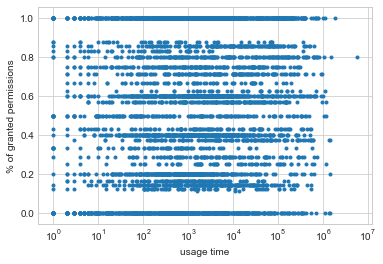

In [11]:
plt.xscale('log')
plt.scatter(x,y,marker='.')
plt.xlabel('usage time')
plt.ylabel('% of granted permissions')
plt.show()

### Comfort level for allowing a permission
calculate the mean comfort level for each participant and store it in a list corrosponding to the permission.
The following lists will have the mean of the comfort level for each participant (dpending on which permission s/he was asked about):
- meanMic
- meanLocation
- meanCamera
- meanContacts
- meanStorage
- meanPhone


In [12]:
#a function to calculate the mean of a list of integers
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)


#read the survey2 table into a dataframe
surveyData=pandas.read_sql_query("select * from survey2", cnx) 
#focus only on the rows with comfort level not empty or not NA
enabledComfortLevel=surveyData[surveyData['comfortableMic']!='NA']
enabledComfortLevel=enabledComfortLevel[enabledComfortLevel['comfortableMic']!='']

comfortLevelMic=enabledComfortLevel[enabledComfortLevel['permission']=='MICROPHONE']
comfortLevelLocation=enabledComfortLevel[enabledComfortLevel['permission']=='LOCATION']
comfortLevelCamera=enabledComfortLevel[enabledComfortLevel['permission']=='CAMERA']
comfortLevelContacts=enabledComfortLevel[enabledComfortLevel['permission']=='CONTACTS']
comfortLevelStorage=enabledComfortLevel[enabledComfortLevel['permission']=='STORAGE']
comfortLevelPhone=enabledComfortLevel[enabledComfortLevel['permission']=='PHONE']

meanMic=[]
meanLocation=[]
meanCamera=[]
meanContacts=[]
meanStorage=[]
meanPhone=[]

enabledComfortLevel
comfortLevelMic
comfortLevelPhone

############try to focus on users who were asked about 3 or more apps

#microphone
for index, row in comfortLevelMic.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
        
    #print(intLevels)
    #print(mean(intLevels))
    #add the mean for the current user to the list
    if len(levels)>2:
        meanMic.append(mean(intLevels))
    
#location
for index, row in comfortLevelLocation.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
        
    #add the mean for the current user to the list
    if len(levels)>2:
        meanLocation.append(mean(intLevels))
    
#Camera
for index, row in comfortLevelCamera.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
        
    #add the mean for the current user to the list
    if len(levels)>2:       
        meanCamera.append(mean(intLevels))

#Contacts
for index, row in comfortLevelContacts.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
    
    #add the mean for the current user to the list
    if len(levels)>2:
        meanContacts.append(mean(intLevels))

#Phone
for index, row in comfortLevelPhone.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1

    #add the mean for the current user to the list
    if len(levels)>2:
        meanPhone.append(mean(intLevels))

#Storage
for index, row in comfortLevelStorage.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
        
    #add the mean for the current user to the list
    if len(levels)>2:
        meanStorage.append(mean(intLevels))
        
        

We can see from the box plot, there are no obvious differences in comfort level between the different permissions.

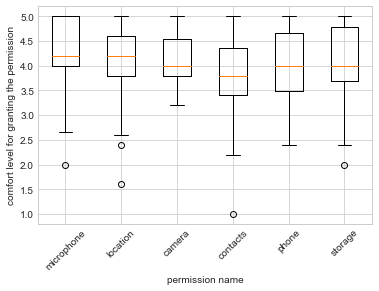

In [13]:
#plot the data:
from matplotlib import pyplot as plt
meanPermissions=[meanMic,meanLocation,meanCamera,meanContacts,meanPhone,meanStorage]
plt.boxplot(meanPermissions)
plt.xticks([1, 2, 3,4,5,6],['microphone','location','camera','contacts','phone','storage'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('comfort level for granting the permission')
#plt.plot(meanLocation, label='Location')
#plt.legend()
plt.show()

Compare the comfort level between permissions, both ANOVA and Kruskal Wallis show that there is no significant difference in comfort level among different permissions.

In [14]:
import scipy.stats as stats
#ANOVA
print(stats.f_oneway(meanMic, meanLocation, meanCamera, meanContacts, meanStorage, meanPhone))

#Kruskal-Wallis
stats.kruskal(meanMic, meanLocation, meanCamera, meanContacts, meanStorage, meanPhone)


F_onewayResult(statistic=1.2274704327830666, pvalue=0.29743717850708323)


KruskalResult(statistic=6.632628400146209, pvalue=0.24942671169799396)

How many people tried to change the permission? Regardless of the comfort level, the majoirty of participants did not change the permission (227 vs. 22) Is there a relationship between comfort level and whether the user tried to disable a permission? (less comfort level > yes tried to disable) (level (range) vs. disable (binary))

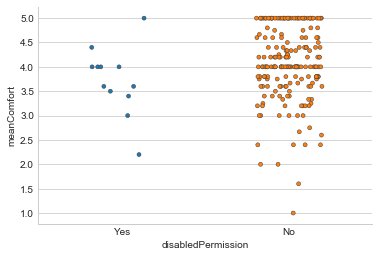

In [15]:
#select changesettingsMic1, count(*) from survey2 where changesettingsMic1!='NA' group by changesettingsMic1
#a function to calculate the mean of a list of integers
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

#read the survey2 table into a dataframe
surveyData=pandas.read_sql_query("select * from survey2", cnx) 
#focus only on the rows with comfort level not empty or not NA
enabledComfortLevel=surveyData[surveyData['comfortableMic']!='NA']
enabledComfortLevel=enabledComfortLevel[enabledComfortLevel['comfortableMic']!='']

meanComfort=[]
disabledPermission=[]
#enabledComfortLevel
#create a new column called mean comfort level
#microphone
for index, row in enabledComfortLevel.iterrows():
    levels=row['comfortableMic'].split(',')
    #convert the list of comfort levels to int, to be able to calculate the mean
    i=0
    intLevels=[]
    while i<len(levels): 
        intLevels.append(int(levels[i]))
        i=i+1
        
    #print(intLevels)
    #print(mean(intLevels))
    #add the mean for the current user to the list
    if len(levels)>2:
        meanComfort.append(mean(intLevels))
        disabledPermission.append(row['changesettingsMic1'])#add this here to have the same list length
#meanComfort  
#combine the two lists into a dataframe:
comfortVSdisabled = pandas.DataFrame(
    {'meanComfort': meanComfort,
     'disabledPermission': disabledPermission})

#now plot meanComfort vs. tried to disable (yes,No)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#np.array(fractionPermissions)#geta slice of the data frame for plotting
#dfFractions=dfPermissions.loc[:, 'fraction of apps granted microphone':'fraction of apps granted sms']
#dfFractions.columns = ['microphone', 'loction', 'camera','contacts','phone','storage','calendar','sensor','sms']
#remove sensors
#dfFractions=dfFractions.drop(['sensor'], axis=1)
#dfFractions
#iris = sns.load_dataset('iris')
sns.stripplot(x="disabledPermission", y="meanComfort",data=comfortVSdisabled, jitter=0.2,size=4,linewidth=0.5)
sns.despine()

### Danger level analysis:
Find correlation between users’ perception of danger and whether they enabled/disabled it.


In [16]:
#prepare danger data


query = ("select a.*, b.danger from permissions a, survey2 b where a.`TurkerID`=b.`TurkerID`")

cursor.execute(query)


#for (x) in cursor:
  #print("{}".format(x))

requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}

with open('dangerLevel_out.csv','w') as out:
    #myFields = ['TurkerID', 'number of permissions requested for microphone', 'number of permissions requested for location', 'number of permissions requested for camera', 'number of permissions requested for contacts', 'number of permissions requested for phone', 'number of permissions requested for storage', 'number of permissions requested for calendar','number of permissions requested sensor','number of permissions requested sms','number of permissions granted for microphone', 'number of permissions granted for location', 'number of permissions granted for camera', 'number of permissions granted for contacts', 'number of permissions granted for phone', 'number of permissions granted for storage', 'number of permissions granted for calendar','number of permissions granted sensor','number of permissions granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
    myFields = ['TurkerID', 'number of apps requested microphone', 'number of apps requested location', 'number of apps requested camera', 'number of apps requested contacts', 'number of apps requested phone', 'number of apps requested storage', 'number of apps requested calendar','number of apps requested sensor','number of apps requested sms','number of apps granted microphone', 'number of apps granted location', 'number of apps granted camera', 'number of apps granted contacts', 'number of apps granted phone', 'number of apps granted storage', 'number of apps granted calendar','number of apps granted sensor','number of apps granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    prevTurk = 'nonsense'
    check = -1
    for row in cursor:
        if row[1] != prevTurk:
                if check != -1:
                    
                    #writer.writerow({'TurkerID':prevTurk,'number of permissions requested for microphone':requestedPerm['MICROPHONE'], 'number of permissions requested for location':requestedPerm['LOCATION'], 'number of permissions requested for camera':requestedPerm['CAMERA'], 'number of permissions requested for contacts':requestedPerm['CONTACTS'], 'number of permissions requested for phone':requestedPerm['PHONE'], 'number of permissions requested for storage':requestedPerm['STORAGE'], 'number of permissions requested for calendar':requestedPerm['CALENDAR'],'number of permissions requested sensor':requestedPerm['SENSORS'],'number of permissions requested sms':requestedPerm['SMS'],'number of permissions granted for microphone':grantedPerm['MICROPHONE'], 'number of permissions granted for location':grantedPerm['LOCATION'], 'number of permissions granted for camera':grantedPerm['CAMERA'], 'number of permissions granted for contacts':grantedPerm['CONTACTS'], 'number of permissions granted for phone':grantedPerm['PHONE'], 'number of permissions granted for storage':grantedPerm['STORAGE'], 'number of permissions granted for calendar':grantedPerm['CALENDAR'],'number of permissions granted sensor':grantedPerm['SENSORS'],'number of permissions granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    prevTurk = row[1]
                    #re-initialize
                    requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                    grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                
                else:
                    check = 1
                    prevTurk = row[1]
    
    
        
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
            
        rrPerm = rPerm.split(',')
        ggPerm = gPerm.split(',')
            
        for x in rrPerm:
            x = x.strip()
            if x != '':
                requestedPerm[x] = requestedPerm[x] + 1
        for y in ggPerm:
            y = y.strip()
            if y != '':
                grantedPerm[y] = grantedPerm[y] + 1
        
        danger = row[8].split(',')
        


dfDanger = pandas.read_csv('dangerLevel_out.csv',sep=',')
        
#cursor.close()
#cnx.close()

Participants percieved the danger of permissions differently, with the calendar the least dangerous and the location the most dangerous.


[3.5652173913043477, 3.511705685618729, 3.448160535117057, 3.100334448160535, 2.7859531772575252, 3.4214046822742477, 3.4581939799331103, 3.5183946488294313, 3.040133779264214]


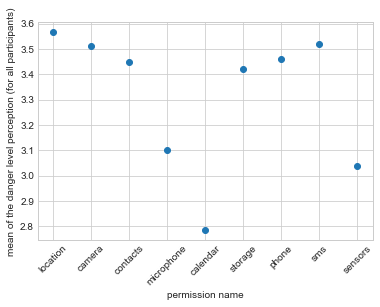

KruskalResult(statistic=145.1565483572854, pvalue=2.0044551014291115e-27)


In [17]:
#plot the perception of permission danger 
permissionsMeans=[dfDanger['danger level of location'].mean(),dfDanger['danger level of camera'].mean(),dfDanger['danger level of contacts'].mean(),dfDanger['danger level of microphone'].mean(),dfDanger['danger level of calendar'].mean(),dfDanger['danger level of storage'].mean(),dfDanger['danger level of phone'].mean(),dfDanger['danger level of sms'].mean(),dfDanger['danger level of sensor'].mean()]
print(permissionsMeans)
#plt.scatter(permissionNames,permissionsMeans)
plt.plot(permissionsMeans,'o')
plt.xticks([0, 1, 2,3,4,5,6,7,8],['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('mean of the danger level perception (for all participants)')
plt.show()

#dfDangerOnly=dfDanger.loc[:, 'danger level of microphone':'danger level of sms']
#dfDangerOnly.columns = ['microphone', 'loction', 'camera','contacts','phone','storage','calendar','sensor','sms']

#warnings.filterwarnings('ignore')
#sns.set_style("whitegrid")
#ax=sns.stripplot(data=dfDangerOnly, jitter=0.3,size=3,linewidth=0.2)
#sns.axes_style("whitegrid") 
#ax.set(xlabel='perception of danger for sensor', ylabel='fraction of times it was granted')
#ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#ax.set(xticks=['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors']))

#plt.show()


import scipy.stats as stats
#ANOVA
stats.f_oneway(dfDanger['danger level of location'],dfDanger['danger level of camera'],dfDanger['danger level of contacts'],dfDanger['danger level of microphone'],dfDanger['danger level of calendar'],dfDanger['danger level of storage'],dfDanger['danger level of phone'],dfDanger['danger level of sms'],dfDanger['danger level of sensor'])
#Kruskal-Wallis
print(stats.kruskal(dfDanger['danger level of location'],dfDanger['danger level of camera'],dfDanger['danger level of contacts'],dfDanger['danger level of microphone'],dfDanger['danger level of calendar'],dfDanger['danger level of storage'],dfDanger['danger level of phone'],dfDanger['danger level of sms'],dfDanger['danger level of sensor']))

plot the mean of the fraction of time each permission was granted against the perception of danger
Since the location was perceived to be the most dangerous, we would like to see if it was granted fewer times than the others.
And for the calendar whether it was granted more since it was percived as least dangerous.

We can see from the plot that:
Eventhough the location to be perceived to be most dangerous , it was granted more times than the other permissions.
For example, location was granted more than the calendar although it was perceived more danerouse.
We expected some kind of negative correlation between the two variables, but it's not showing in our data. The pearson correlation is not statistically significant. (r=-0.2 , p>0.5)

(-0.15696469588302678, 0.68672687485502193)


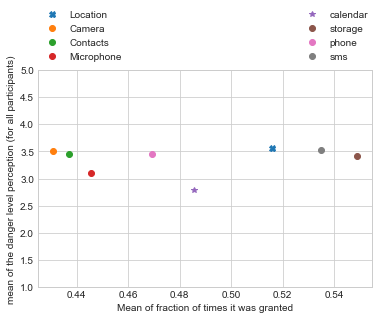

In [18]:

location=dfDanger['number of apps granted location']/dfDanger['number of apps requested location']
camera=dfDanger['number of apps granted camera']/dfDanger['number of apps requested camera']
contacts=dfDanger['number of apps granted contacts']/dfDanger['number of apps requested contacts']
microphone=dfDanger['number of apps granted microphone']/dfDanger['number of apps requested microphone']
calendar=dfDanger['number of apps granted calendar']/dfDanger['number of apps requested calendar']
storage=dfDanger['number of apps granted storage']/dfDanger['number of apps requested storage']
phone=dfDanger['number of apps granted phone']/dfDanger['number of apps requested phone']
sms=dfDanger['number of apps granted sms']/dfDanger['number of apps requested sms']
sensors=dfDanger['number of apps granted sensor']/dfDanger['number of apps requested sensor']

permissionCounts=[location,camera,contacts,microphone,calendar,storage,phone,sms,sensors]
permissionsFractions=[location.mean(),camera.mean(),contacts.mean(),microphone.mean(),calendar.mean(),storage.mean(),phone.mean(),sms.mean(),sensors.mean()]
permissionNames=['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors']

permissionsPerceptionMeans=[dfDanger['danger level of location'].mean(),dfDanger['danger level of camera'].mean(),dfDanger['danger level of contacts'].mean(),dfDanger['danger level of microphone'].mean(),dfDanger['danger level of calendar'].mean(),dfDanger['danger level of storage'].mean(),dfDanger['danger level of phone'].mean(),dfDanger['danger level of sms'].mean(),dfDanger['danger level of sensor'].mean()]

print(pearsonr(permissionsPerceptionMeans, permissionsFractions))

#plot the mean of the fraction of time each permission was granted against the perception of danger
y=permissionsPerceptionMeans[0]
x=permissionsFractions[0]
plt.plot(x, y, 'X', label='Location')

y=permissionsPerceptionMeans[1]
x=permissionsFractions[1]

plt.plot(x, y, 'o', label='Camera')

y=permissionsPerceptionMeans[2]
x=permissionsFractions[2]

plt.plot(x, y, 'o', label='Contacts')

y=permissionsPerceptionMeans[3]
x=permissionsFractions[3]

plt.plot(x, y, 'o', label='Microphone')


y=permissionsPerceptionMeans[4]
x=permissionsFractions[4]

plt.plot(x, y, '*', label='calendar')

y=permissionsPerceptionMeans[5]
x=permissionsFractions[5]

plt.plot(x, y, 'o', label='storage')

y=permissionsPerceptionMeans[6]
x=permissionsFractions[6]

plt.plot(x, y, 'o', label='phone')

y=permissionsPerceptionMeans[7]
x=permissionsFractions[7]

plt.plot(x, y, 'o', label='sms')

#y=permissionsPerceptionMeans[8]
#x=permissionsFractions[8]

#plt.plot(x, y, 'o', label='sensors')

#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
plt.ylim(1.0, 5.0)
plt.xlabel('Mean of fraction of times it was granted')
plt.ylabel('mean of the danger level perception (for all participants)')
plt.show()




#plt.figure()
#plt.boxplot(permissionCounts)
#plt.xticks([1, 2, 3,4,5,6,7,8,9],['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors'])
#plt.xticks(rotation=45)
#plt.xlabel('permission name')
#plt.ylabel('fraction of times it was granted')
#plt.show()


#plt.scatter(permissionNames,permissionsMeans)
#plt.plot(permissionsFractions,'o')
#plt.xticks([0, 1, 2,3,4,5,6,7,8],['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors'])
#plt.xticks(rotation=45)
#plt.xlabel('permission name')
#plt.ylabel('mean of the number of times it was granted (for all participants)')
#plt.show()




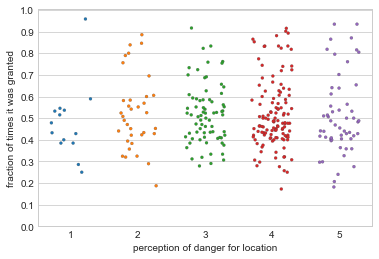

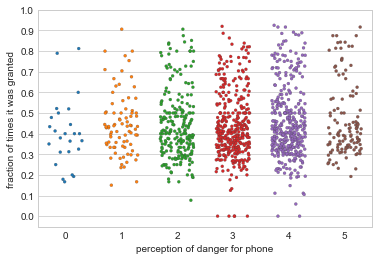

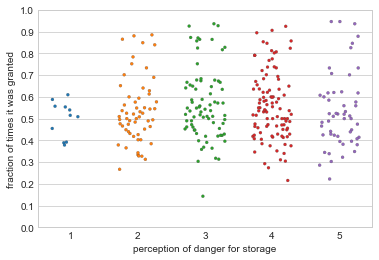

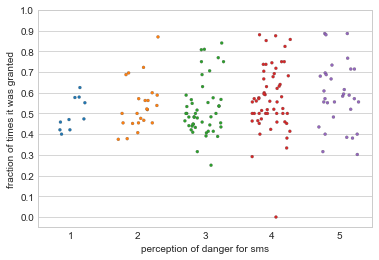

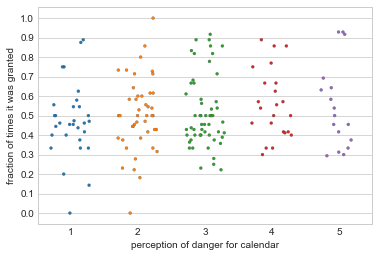

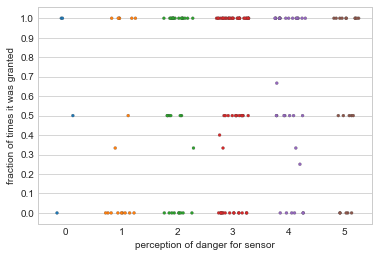

Location correlation: 
(0.0093581239615167684, 0.87198091452308302)
Camera correlation: 
(-0.036944439818413576, 0.52453494317143101)
Microphone correlation: 
(0.11244097956095787, 0.052100070050235939)
Phone correlation: 
(0.036330182556340171, 0.53145737795538339)
Contacts correlation: 
(0.029723407693830611, 0.60870275645681782)
Storage correlation: 
(0.023358409603729442, 0.68748699956109571)
sms correlation: 
(0.18093315256984036, 0.018922323057644921)
sensor correlation: 
(0.10236523580591947, 0.18671140139367415)
calendar correlation: 
(0.13187811385478365, 0.088376536123960819)


In [19]:
#stat analysis
from scipy import stats
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
#help(pearsonr)


#calculate the correlation between the perception of danger and number of times the permission was granted
#data = pandas.read_csv('/Users/QN/Desktop/THIRD crowdperm/Analysis code/dangerLevel_out.csv', sep=',', na_values=".")
#data=dfDanger
#location
x=dfDanger['danger level of location']
y=dfDanger['number of apps granted location']/dfDanger['number of apps requested location']
#spearmanr(x,y)
location=pearsonr(x, y)


warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of location'],y=dfDanger['number of apps granted location']/dfDanger['number of apps requested location'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for location', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

plt.show()

#mic
x=dfDanger['danger level of microphone']
y=dfDanger['number of apps granted microphone']/dfDanger['number of apps requested microphone']
mic=pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of microphone'],y=dfDanger['number of apps granted microphone']/dfDanger['number of apps requested microphone'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for microphone', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

#plt.show()

#camera
x=dfDanger['danger level of camera']
y=dfDanger['number of apps granted camera']/dfDanger['number of apps requested camera']
camera=pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of camera'],y=dfDanger['number of apps granted camera']/dfDanger['number of apps requested camera'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for camera', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#plt.show()

#contacts
x=dfDanger['danger level of contacts']
y=dfDanger['number of apps granted contacts']/dfDanger['number of apps requested contacts']
contacts =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of contacts'],y=dfDanger['number of apps granted contacts']/dfDanger['number of apps requested contacts'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for contacts', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#plt.show()

#phone
x=dfDanger['danger level of phone']
y=dfDanger['number of apps granted phone']/dfDanger['number of apps requested phone']
phone =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of phone'],y=dfDanger['number of apps granted phone']/dfDanger['number of apps requested phone'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for phone', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#storage
x=dfDanger['danger level of storage']
y=dfDanger['number of apps granted storage']/dfDanger['number of apps requested storage']
storage =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of storage'],y=dfDanger['number of apps granted storage']/dfDanger['number of apps requested storage'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for storage', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#skip the rows with zero requested permissions
dfDanger=dfDanger[dfDanger['number of apps requested sensor'] > 0]
dfDanger=dfDanger[dfDanger['number of apps requested sms'] > 0]

#sms
x=dfDanger['danger level of sms']
y=dfDanger['number of apps granted sms']/dfDanger['number of apps requested sms']
sms =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of sms'],y=dfDanger['number of apps granted sms']/dfDanger['number of apps requested sms'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for sms', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#calendar
x=dfDanger['danger level of calendar']
y=dfDanger['number of apps granted calendar']/dfDanger['number of apps requested calendar']
calendar =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of calendar'],y=dfDanger['number of apps granted calendar']/dfDanger['number of apps requested calendar'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for calendar', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#sensor
x=dfDanger['danger level of sensor']
y=dfDanger['number of apps granted sensor']/dfDanger['number of apps requested sensor']
sensor =pearsonr(x, y)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
ax=sns.stripplot(x=dfDanger['danger level of sensor'],y=dfDanger['number of apps granted sensor']/dfDanger['number of apps requested sensor'],data=dfDanger, jitter=0.3,size=3,linewidth=0.2)
sns.axes_style("whitegrid") 
ax.set(xlabel='perception of danger for sensor', ylabel='fraction of times it was granted')
ax.set(yticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

print("Location correlation: ")
print(location)

print("Camera correlation: ")
print(camera)

print("Microphone correlation: ")
print(mic)

print("Phone correlation: ")
print(phone)

print("Contacts correlation: ")
print(contacts)

print("Storage correlation: ")
print(storage)

print("sms correlation: ")
print(sms)

print("sensor correlation: ")
print(sensor)

print("calendar correlation: ")
print(calendar)
#plt.plot(x,y)
#plt.show()

### Story question:
Comfort level of decsion (re-enabled vs. uninstalled:)

In [20]:
#look at the story questions
#select * from survey2 where story !='No'
#in stories:
#compare the comfort level for re-enabling the permission vs. deleting the app 
from scipy.stats.stats import mannwhitneyu
from scipy.stats.stats import ttest_ind

#read the survey2 table into a dataframe
surveyData=pandas.read_sql_query("select * from survey2", cnx) 
#focus only on stories
stories=surveyData[surveyData['storySolve']!='NA']

#coding the comfort level questions for stories
storyUninstallComfort=[]
storyEnableComfort=[]
for index, row in stories.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    if row['storyUninstallComfort'] == 'strongly agree':
        storyUninstallComfort.append(5)
    if row['storyUninstallComfort'] == 'agree':
        storyUninstallComfort.append(4)
    if row['storyUninstallComfort'] == 'neutral':
        storyUninstallComfort.append(3)
    if row['storyUninstallComfort'] == 'disagree':
        storyUninstallComfort.append(2)
    if row['storyUninstallComfort'] == 'strongly disagree':
        storyUninstallComfort.append(1)
        
    if row['storyEnableComfort'] == 'strongly agree':
        storyEnableComfort.append(5)
    if row['storyEnableComfort'] == 'agree':
        storyEnableComfort.append(4)
    if row['storyEnableComfort'] == 'neutral':
        storyEnableComfort.append(3)
    if row['storyEnableComfort'] == 'disagree':
        storyEnableComfort.append(2)
    if row['storyEnableComfort'] == 'strongly disagree':
        storyEnableComfort.append(1)

        
x=storyEnableComfort
y=storyUninstallComfort
mannwhitneyu(x, y, use_continuity=True, alternative=None)
#ttest_ind(x, y, axis=0, equal_var=True)

MannwhitneyuResult(statistic=393.0, pvalue=1.2168272226944897e-06)

In [21]:
#close DB connection
cnx.close()